# Computer Vision - Assignment 2 - Deep Learning for Computer Vision

#### 10 points   |   Due date: March 24, 23:59   |   Submission site: https://pradoposgrado2324.ugr.es/

### Student's Full Name: <mark> MAHSHAD GOLAFSHAN </mark>

The goal of this assignment is to learn how to implement and use Convolutional Neural Networks using the fastai library (https://docs.fast.ai/).

<font color='blue'>The goal of this assignmnet is to gain experience designing and training deep neural networks (in particular, convolutional neural networks). From a base network architecture that is provided, you have to learn to perform experiments with it and to improve it by adding, modifying or deleting layers.

<font color='blue'>A help guide (`Assignment_2_HG.ipynb`) is also provided to know how:
1. Basic functions of reading data, training and optimization can be performed;
2. Graphs for the evolution of the classification error in
the training and validation sets can be created;
3. The classification error in the test set can be computed.

In [ ]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
# Function to display evaluation metrics
# Developed by Ignacio Oguiza: https://forums.fast.ai/t/plotting-metrics-after-learning/69937

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# <font color='blue'>**Exercise 1: BaseNet in CIFAR100 (3 points)**

<font color='blue'>*Dataset:*
In this exercise, we will work with part of the CIFAR100 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). This dataset consists of 60K color images of 32x32x3 (RGB) depicting 100 different classes (600 images per class). There are 50K images for training and 10K for testing. For the development of the exercise we will only consider 25 classes (out of 100). Therefore, the training set has 12,500 images and the test set 2,500 images. 10% of the training set will be used for validation.

<font color='blue'>**Model BaseNet:**
We start by creating a base model called *BaseNet* which, after its training and execution, will give us a classification error which will be used as reference or baseline for further improvements.

<font color='blue'>Our BaseNet model consists of two convolutional blocks (Conv+ReLU) at different scales (MaxPooling), and one head composed of two fully-connected (FC) layers (also called dense layers). The precise architecture is defined in the table below:

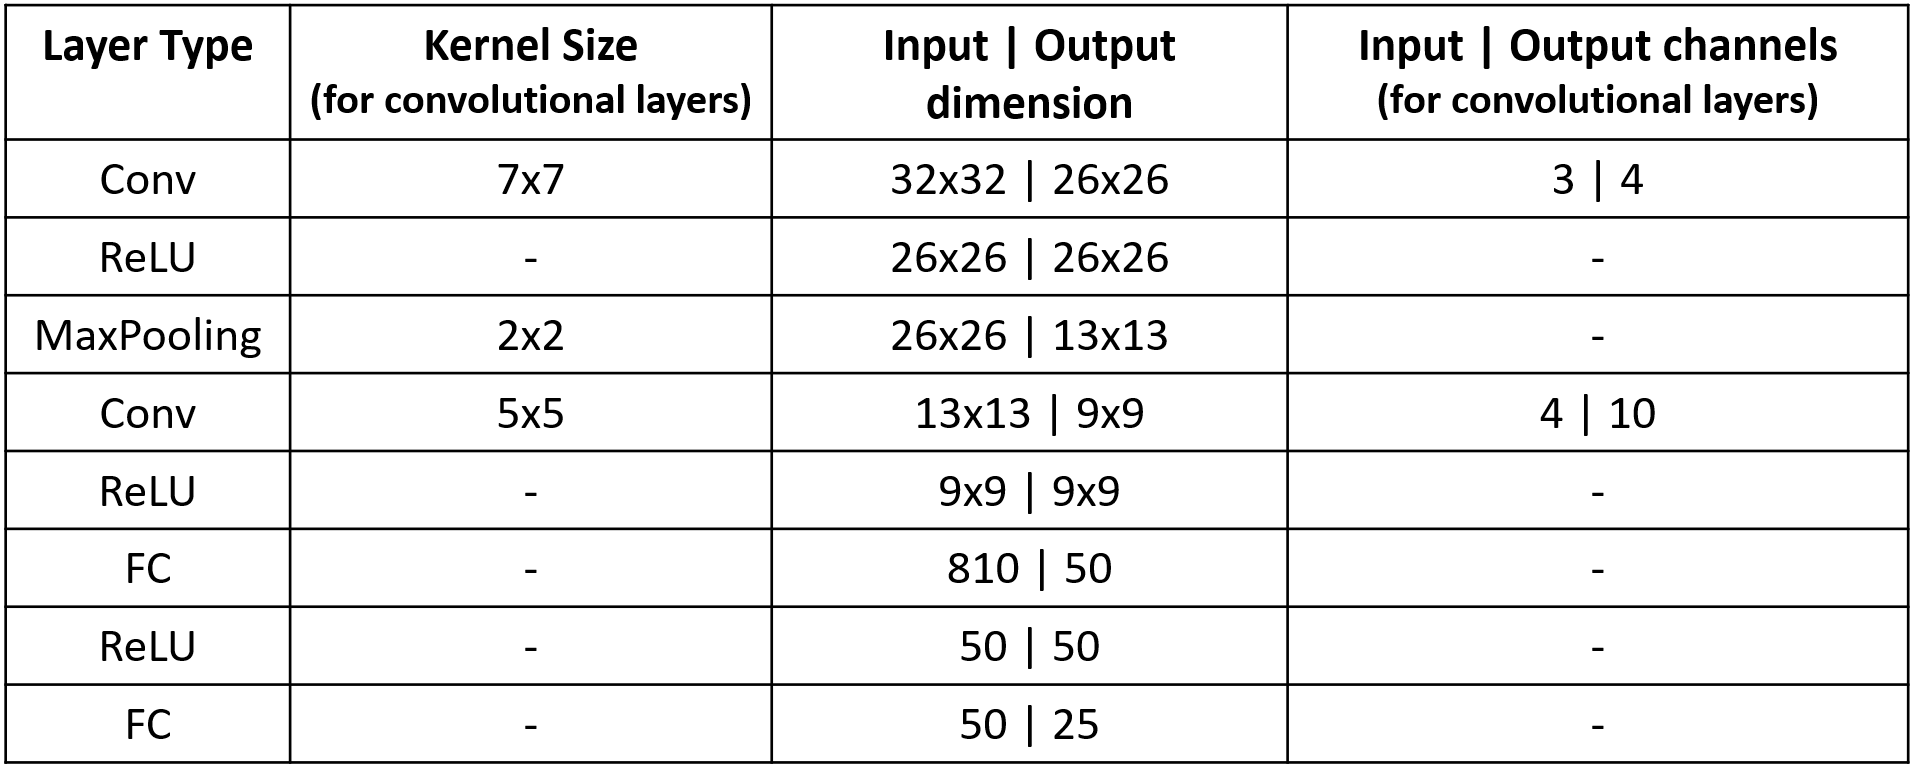


<font color='blue'>The students must:
1. Become familiar with the *BaseNet* architecture described above, the meaning of the different hyperparameters and the purpose of each layer. Create the code for the *BaseNet* model employing the fastai library.
2. Train the model (justifying all decisions made) and evaluate its performance. To do so, you should employ: the confusion matrix in training and testing; the accuracy in training, validation and test; and the evolution of both the loss function (in training and validation) and accuracy (in validation) with respect to the training epochs.

<font color='blue'>Note: This is the base model that we will try to improve in the next section. In this sense, it is not necessary to carry out a very sophisticated or complex training procedure. In any case, it is not advisable to use the default values of functions without having a justification for it. One must demonstrate that he/she understands what is doing, as well as what the framework does underneath.

In [ ]:
# We get the CIFAR100 dataset
path = untar_data(URLs.CIFAR_100,force_download=True)

In [ ]:
# The CIFAR_100 dataset, as well as the MNIST dataset, follows a common layout for machine learning datasets:
# separate folders for the training set and the validation set (and/or test set).
# Let's see what's inside both the training and test sets
print(path)
print(path.ls())
print((path/'train').ls())
print((path/'test').ls())
train_classes = (path/'train').ls()
test_classes = (path/'test').ls()
print(len(train_classes))

/root/.fastai/data/cifar100
[Path('/root/.fastai/data/cifar100/test'), Path('/root/.fastai/data/cifar100/train')]
[Path('/root/.fastai/data/cifar100/train/flowers'), Path('/root/.fastai/data/cifar100/train/vehicles_1'), Path('/root/.fastai/data/cifar100/train/large_man-made_outdoor_things'), Path('/root/.fastai/data/cifar100/train/insects'), Path('/root/.fastai/data/cifar100/train/fish'), Path('/root/.fastai/data/cifar100/train/aquatic_mammals'), Path('/root/.fastai/data/cifar100/train/household_electrical_devices'), Path('/root/.fastai/data/cifar100/train/reptiles'), Path('/root/.fastai/data/cifar100/train/large_omnivores_and_herbivores'), Path('/root/.fastai/data/cifar100/train/people'), Path('/root/.fastai/data/cifar100/train/food_containers'), Path('/root/.fastai/data/cifar100/train/trees'), Path('/root/.fastai/data/cifar100/train/fruit_and_vegetables'), Path('/root/.fastai/data/cifar100/train/medium_mammals'), Path('/root/.fastai/data/cifar100/train/vehicles_2'), Path('/root/.fast


"This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs)." https://github.com/fastai/dlcert2/blob/master/docs/datasets.md

In [ ]:
# We want to verify that within each of the 20 superclasses there are 5 classes,
# which gives the 100 classes there are. We also want to verify that the number of images is correct
print('Classes within the first superclass (',train_classes[0],'): ', train_classes[0].ls())
for i in range(20):
  print('Number of classes within superclass ',i,': ', len(train_classes[i].ls()))
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Classes within the first superclass ( /root/.fastai/data/cifar100/train/flowers ):  [Path('/root/.fastai/data/cifar100/train/flowers/rose'), Path('/root/.fastai/data/cifar100/train/flowers/poppy'), Path('/root/.fastai/data/cifar100/train/flowers/sunflower'), Path('/root/.fastai/data/cifar100/train/flowers/tulip'), Path('/root/.fastai/data/cifar100/train/flowers/orchid')]
Number of classes within superclass  0 :  5
Number of classes within superclass  1 :  5
Number of classes within superclass  2 :  5
Number of classes within superclass  3 :  5
Number of classes within superclass  4 :  5
Number of classes within superclass  5 :  5
Number of classes within superclass  6 :  5
Number of classes within superclass  7 :  5
Number of classes within superclass  8 :  5
Number of classes within superclass  9 :  5
Number of classes within superclass  10 :  5
Number of classes within superclass  11 :  5
Number of classes within superclass  12 :  5
Number of classes within superclass  13 :  5
Number

In [ ]:
# We keep the first 25 classes (we remove the last 75 from the dataset)
#https://stackoverflow.com/questions/185936/how-to-delete-the-contents-of-a-folder
import shutil
number_of_classes_to_keep = 25
number_of_superclasses_to_keep = int(number_of_classes_to_keep/5)
print('REMOVED SUPERCLASSES:')
for i in range(number_of_superclasses_to_keep,len(train_classes)):
  print(train_classes[i])
  shutil.rmtree(train_classes[i])
print('SUPERCLASSES WE KEEP:')
for i in range(number_of_superclasses_to_keep):
  print(train_classes[i])

REMOVED SUPERCLASSES:
/root/.fastai/data/cifar100/train/aquatic_mammals
/root/.fastai/data/cifar100/train/household_electrical_devices
/root/.fastai/data/cifar100/train/reptiles
/root/.fastai/data/cifar100/train/large_omnivores_and_herbivores
/root/.fastai/data/cifar100/train/people
/root/.fastai/data/cifar100/train/food_containers
/root/.fastai/data/cifar100/train/trees
/root/.fastai/data/cifar100/train/fruit_and_vegetables
/root/.fastai/data/cifar100/train/medium_mammals
/root/.fastai/data/cifar100/train/vehicles_2
/root/.fastai/data/cifar100/train/household_furniture
/root/.fastai/data/cifar100/train/large_carnivores
/root/.fastai/data/cifar100/train/non-insect_invertebrates
/root/.fastai/data/cifar100/train/small_mammals
/root/.fastai/data/cifar100/train/large_natural_outdoor_scenes
SUPERCLASSES WE KEEP:
/root/.fastai/data/cifar100/train/flowers
/root/.fastai/data/cifar100/train/vehicles_1
/root/.fastai/data/cifar100/train/large_man-made_outdoor_things
/root/.fastai/data/cifar100/t

In [ ]:
# We also remove the classes from the test set
for i in range(number_of_superclasses_to_keep,len(test_classes)):
  print(test_classes[i])
  shutil.rmtree(test_classes[i])

/root/.fastai/data/cifar100/test/aquatic_mammals
/root/.fastai/data/cifar100/test/household_electrical_devices
/root/.fastai/data/cifar100/test/reptiles
/root/.fastai/data/cifar100/test/large_omnivores_and_herbivores
/root/.fastai/data/cifar100/test/people
/root/.fastai/data/cifar100/test/food_containers
/root/.fastai/data/cifar100/test/trees
/root/.fastai/data/cifar100/test/fruit_and_vegetables
/root/.fastai/data/cifar100/test/medium_mammals
/root/.fastai/data/cifar100/test/vehicles_2
/root/.fastai/data/cifar100/test/household_furniture
/root/.fastai/data/cifar100/test/large_carnivores
/root/.fastai/data/cifar100/test/non-insect_invertebrates
/root/.fastai/data/cifar100/test/small_mammals
/root/.fastai/data/cifar100/test/large_natural_outdoor_scenes


In [ ]:
# Now we check if we have remove them correctly
print(path)
train_classes = (path/'train').ls()
test_classes = (path/'test').ls()
print(len(train_classes))
print(len(test_classes))

/root/.fastai/data/cifar100
5
5


In [ ]:
# And that the number of examples in training and test is correct
print('Classes within the first superclass (',train_classes[0],'): ', train_classes[0].ls())
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Classes within the first superclass ( /root/.fastai/data/cifar100/train/flowers ):  [Path('/root/.fastai/data/cifar100/train/flowers/rose'), Path('/root/.fastai/data/cifar100/train/flowers/poppy'), Path('/root/.fastai/data/cifar100/train/flowers/sunflower'), Path('/root/.fastai/data/cifar100/train/flowers/tulip'), Path('/root/.fastai/data/cifar100/train/flowers/orchid')]
Total training images:  12500
Total test images:  2500


In [ ]:
# To be completed by the students



<font color= 'orange'>I'm  going to explain each cell, before the cell of code and discussion about the result, after the sode cell





at first I just fix the seed to 42 to avoid getting different result each time I run the code and also I add the `fix_seed` function at the first of each enhanced Convolutional Neural Network in the rest.

In [ ]:
#fix the seed to 42
import random
def fix_seed():
  random.seed(42)
  np.random.seed(42)
  torch.manual_seed(42)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

here I want to explain the "datablock":

1. `DataBlock`: This is a class in the `fastai` library that helps in preparing data for training. It allows you to define how your data should be loaded, preprocessed, and split into training and validation sets.

2. `blocks=(ImageBlock, CategoryBlock)`: This specifies the type of data blocks you're working with. In this case, it indicates that the input data are images (`ImageBlock`) and the labels are categories (`CategoryBlock`).

3. `get_items=get_image_files`: This is a function that provides a list of image file paths. `get_image_files` is a utility function from the `fastai.data.external` module, which retrieves all image files recursively from a given path.

4. `splitter=RandomSplitter(valid_pct=0.1, seed=42)`: This determines how the data will be split into training and validation sets. `RandomSplitter` randomly splits the data, reserving 10% for validation. The `seed=42` ensures reproducibility by fixing the random seed.

5. `get_y=parent_label`: This is a function used to extract labels from the file paths. `parent_label` is a function from `fastai.data.transforms` module that returns the name of the parent directory as the label for each image.

6. `item_tfms=Resize(32)`: This specifies the transformations to be applied to each item (image) before feeding it into the model. `Resize(32)` resizes each image to a square of size 32x32 pixels.

```python
dls = datablock.dataloaders(path, bs=32)
```

1. `dls`: This variable holds the dataloaders generated by the `DataBlock`. Dataloaders are iterators that provide batches of data during training and validation.

2. `datablock.dataloaders(path, bs=32)`: This line creates the dataloaders using the `DataBlock` configuration. `path` is the directory containing the data, and `bs=32` sets the batch size to 32.


at the end of this part, I displays a batch of data samples from the dataloaders with this line: `dls.show_batch()`


here I start to write the basenet of the Convolutional Neural Network:
it is using fastai/PyTorch's nn.Sequential module.
in below I define each component:

1. `nn.Conv2d(3, 4, kernel_size=7, padding=0)`: This is a convolutional layer. It takes an input with 3 channels (assuming RGB images) and produces an output with 4 channels. The kernel size is 7x7, meaning it convolves the input image with 7x7 filters. Padding is set to 0, indicating no padding around the input. This layer applies a 2-dimensional convolution operation on the input.

2. `nn.ReLU()`: This is the rectified linear unit activation function. It introduces non-linearity to the network by outputting the input directly if it is positive, otherwise, it outputs zero.

3. `nn.MaxPool2d(kernel_size=2)`: This is a max pooling layer. It reduces the spatial dimensions of the input by taking the maximum value within each 2x2 window. This helps in reducing computational complexity and extracting dominant features.

4. `nn.Conv2d(4, 10, kernel_size=5, padding=0)`: Another convolutional layer. It takes an input with 4 channels (output from the previous layer) and produces an output with 10 channels. The kernel size is 5x5, indicating convolution with 5x5 filters.

5. `nn.ReLU()`: Another ReLU activation function.

6. `Flatten()`: This is a custom module or function to flatten the output from the previous convolutional layers. It converts the multi-dimensional tensor into a 1-dimensional tensor, typically used to prepare the data for fully connected layers.

7. `nn.Linear(810,50)`: This is a fully connected (linear) layer. It takes 810 input features and produces 50 output features. Each neuron in this layer is connected to every neuron in the previous layer, hence it's fully connected.

8. `nn.ReLU()`: Another ReLU activation function.

9. `nn.Linear(50,25)`: Another fully connected layer. It takes 50 input features and produces 25 output features.

So, in summary, this BaseNet model consists of alternating convolutional layers with ReLU activation functions, followed by max pooling for downsampling. After a few convolutional layers, the output is flattened and passed through fully connected layers with ReLU activation functions. Finally, it produces an output with 25 features.



1. **Create Learner**:
```python
learn = Learner(dls, base_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
```
This code creates a `Learner` object, which is used for training and inference. Here:
   - `dls`: This is the dataloaders object containing the training and validation data.
   - `base_model`: This is the neural network model defined earlier, `base_model`.
   - `loss_func=CrossEntropyLossFlat()`: This specifies the loss function to use during training. Here, it's cross-entropy loss, suitable for multi-class classification problems.
   - `metrics=accuracy`: This specifies the evaluation metric to monitor during training. Here, it's accuracy, which measures the percentage of correct predictions.

2. **Train the model**:
```python
lr=learn.lr_find()
learn.fit_one_cycle(n_epoch=10,lr_max=lr[0])
```
   - `lr=learn.lr_find()`: This finds the optimal learning rate for training the model. It's a method for determining a suitable learning rate based on the model's loss curve.
   - `learn.fit_one_cycle(n_epoch=10,lr_max=lr[0])`: This trains the model for 10 epochs using the one-cycle learning rate policy. The learning rate is set to the maximum learning rate found earlier (`lr_max`) using the learning rate finder.

3. **Show metrics**:
```python
learn.recorder.plot_metrics()
```
This line plots the training and validation metrics recorded during training. It provides insight into how the model's performance changes over epochs.

4. **Show results**:
```python
learn.show_results()
```
This line displays a batch of predictions alongside their ground truth labels, allowing you to visually inspect the model's performance.

5. **Test the model**:
```python
test_files = get_image_files(path/'test')
test_dl = learn.dls.test_dl(test_files, with_labels=True)
preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)
print('The test accuracy is : ', round(float(acc)*100, 4), '%')
```
   - `test_files`: This gets a list of image files from the test directory.
   - `test_dl = learn.dls.test_dl(test_files, with_labels=True)`: This creates a dataloader for the test set with labels.
   - `preds, targs = learn.get_preds(dl=test_dl)`: This generates predictions (`preds`) for the test set using the trained model and compares them with the actual labels (`targs`).
   - `acc = accuracy(preds, targs)`: This calculates the accuracy of the model on the test set.
   - `print('The test accuracy is : ', round(float(acc)*100, 4), '%')`: This prints the test accuracy rounded to four decimal places.

6. **Interpret the model**:
```python
interp = ClassificationInterpretation.from_learner(learn, 1, test_dl)
cm = interp.confusion_matrix()
print('Number of test examples:', np.sum(cm))
interp.plot_confusion_matrix(figsize=(12, 12), title='Confusion Matrix for the Test Set')
print('Test Accuracy')
print(np.sum(np.diagonal(cm))/np.sum(cm)*100)
```
   - `interp = ClassificationInterpretation.from_learner(learn, 1, test_dl)`: This creates an interpretation object for the learner, which provides insights into the model's performance.
   - `cm = interp.confusion_matrix()`: This generates a confusion matrix based on the predictions and actual labels.
   - `print('Number of test examples:', np.sum(cm))`: This prints the total number of test examples.
   - `interp.plot_confusion_matrix(figsize=(12, 12), title='Confusion Matrix for the Test Set')`: This plots the confusion matrix, showing how the model's predictions align with the actual labels.
   - `print('Test Accuracy')`: This prints the test accuracy.
   - `print(np.sum(np.diagonal(cm))/np.sum(cm)*100)`: This calculates and prints the test accuracy based on the confusion matrix.

epoch,train_loss,valid_loss,accuracy,time
0,2.756899,2.703614,0.182667,00:25
1,2.418288,2.450706,0.265333,00:29
2,2.271247,2.295091,0.320000,00:30
3,2.197387,2.190008,0.337333,00:26
4,2.069206,2.154614,0.358667,00:23
5,2.002408,2.076880,0.378000,00:25
6,1.848935,2.034968,0.393333,00:27
7,1.821853,1.971930,0.416667,00:25
8,1.748224,1.956061,0.422667,00:25
9,1.727957,1.952543,0.424667,00:27


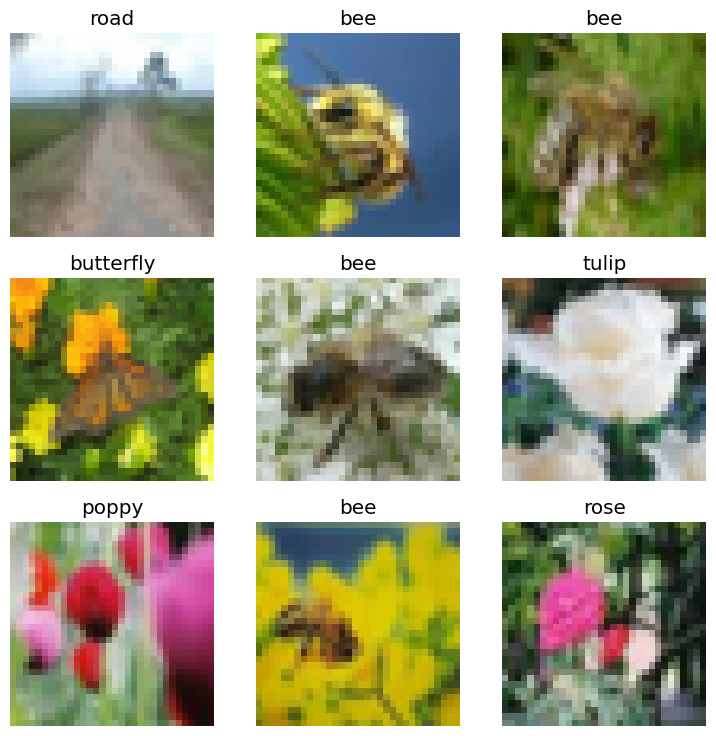

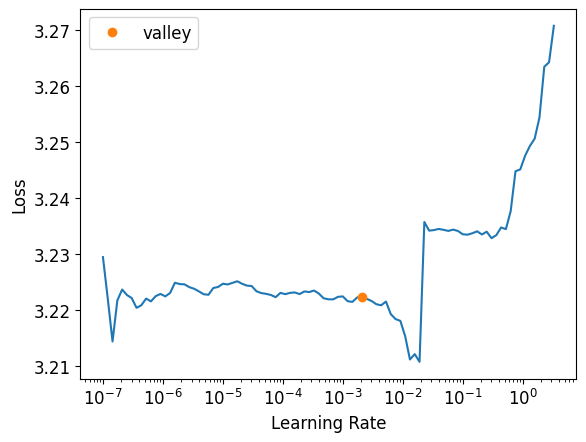

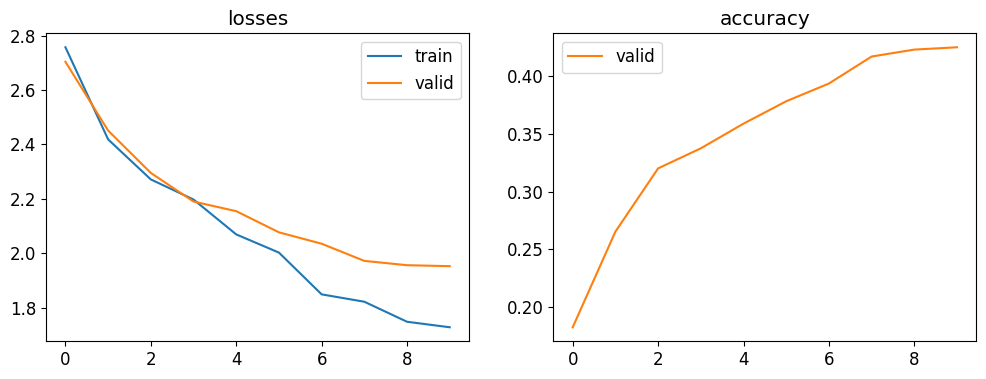

The test accuracy is :  47.2 %


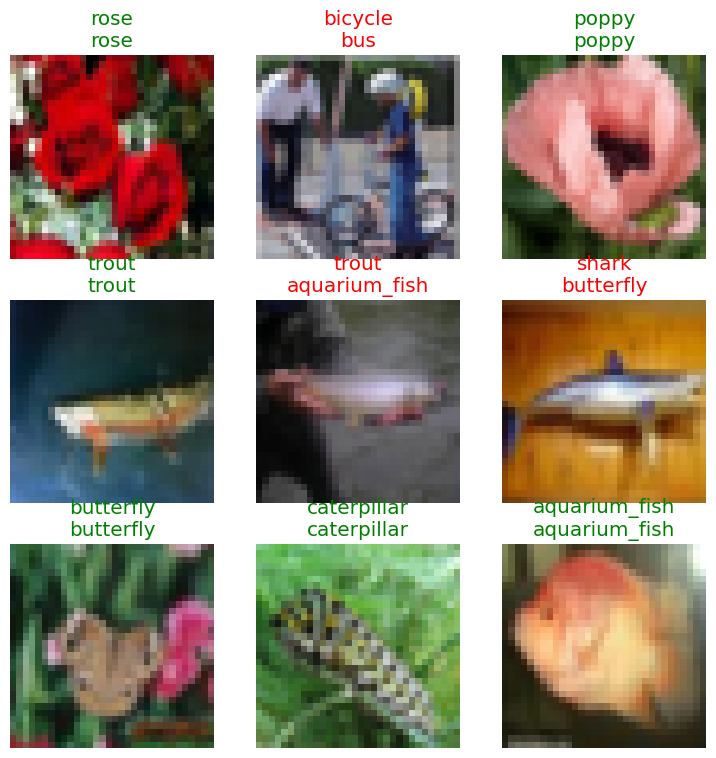

In [ ]:
fix_seed()
# Create DataBlock and DataLoader
datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                      get_items=get_image_files,
                      splitter=RandomSplitter(valid_pct=0.1, seed=42),
                      get_y=parent_label,
                      item_tfms=Resize(32))
                      # item_tfms = [RandomResizedCrop(32, min_scale=0.35), FlipItem(0.5)],
                      # batch_tfms = aug_transforms())

dls = datablock.dataloaders(path, bs=32)

#show batch
dls.show_batch()

#import nn
from torch import nn
# BaseNet model definition
base_model = nn.Sequential(
    nn.Conv2d(3, 4, kernel_size=7, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(4, 10, kernel_size=5, padding=0),
    nn.ReLU(),
    Flatten(),
    nn.Linear(810,50),
    nn.ReLU(),
    nn.Linear(50,25)
)

# Create Learner
learn = Learner(dls, base_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.summary()

# Train the model
lr=learn.lr_find()
learn.fit_one_cycle(n_epoch=10,lr_max=lr[0])

#show
learn.recorder.plot_metrics()
learn.show_results()

#test
test_files = get_image_files(path/'test')
# Create a dataloader for the test set with labels
test_dl = learn.dls.test_dl(test_files, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)
print('The test accuracy is : ', round(float(acc)*100, 4), '%')

as we can see from the grid, the validation accuracy is increasing after that I show some of the dataset picture with their label, in the plot of loss and learning rate we have the base situation of them that they have.
in the losses plot we can see: both train and validation loss are decreasing and it is very good and also in the accuracy graph we have the increasing line that is also perfect.
the test accuracy is 47.2%
in the end we have the dataset with the right predicted label(green) and the wrong predicted(red).


here  I want to show the number of test example, test accuracy and confusion matrix

Number of test examples: 2500


Test Accuracy
47.199999999999996


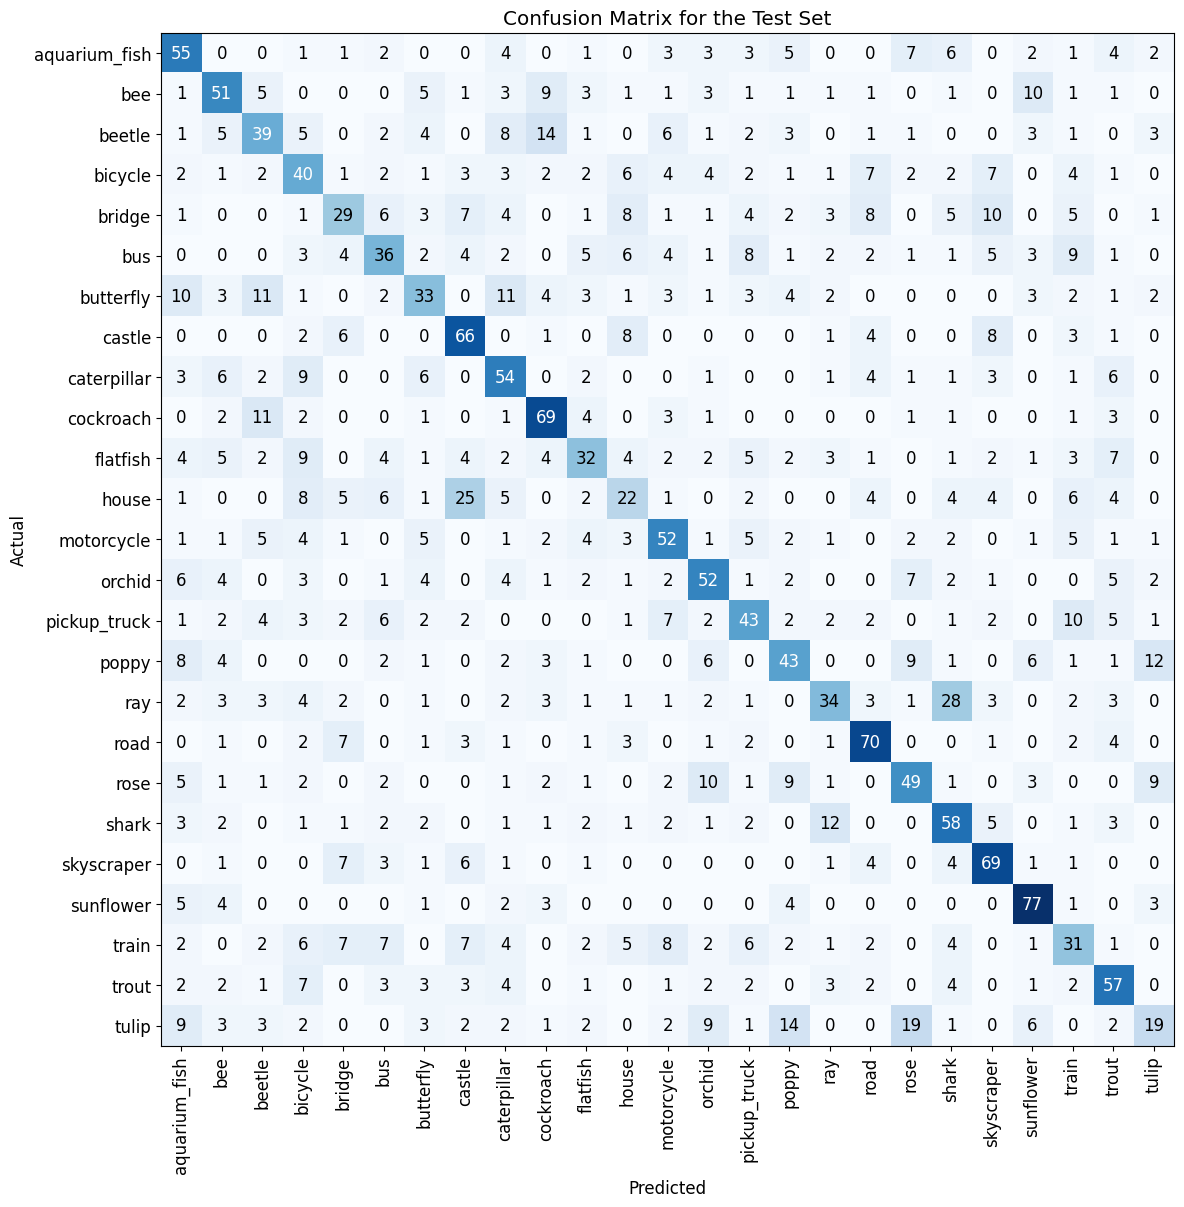

In [ ]:
interp = ClassificationInterpretation.from_learner(learn, 1, test_dl)
cm = interp.confusion_matrix()
print('Number of test examples:', np.sum(cm))
interp.plot_confusion_matrix(figsize=(12, 12),title='Confusion Matrix for the Test Set')
print('Test Accuracy')
print(np.sum(np.diagonal(cm))/np.sum(cm)*100)

we can realize from the confusion matrix by comparing the actual and predicted picture that: each of the class are confused by which class and the number of true classification that model can do.for example:for sunflower we have the highest number of 77 that means in 77 picture of sunflower, the model can truely understant the sunflower and for example in just 1 picture the model confused the sunflower with butterfly.


This line of code is used to plot the top losses from the classification interpretation object (`interp`). Here's what each parameter does:

1. `interp.plot_top_losses(10, nrows=2, figsize=(32,4))`:
   - `10`: This specifies the number of samples to display with the highest loss values. In this case, it will display the top 10 samples with the highest loss values.
   - `nrows=2`: This specifies the number of rows for the plot grid. Here, it sets the number of rows to 2, meaning the top losses will be displayed in two rows.
   - `figsize=(32,4)`: This specifies the size of the figure that will contain the plot. The first value (32) indicates the width of the figure in inches, and the second value (4) indicates the height in inches. This ensures the plot is appropriately sized for visualization.

When executed, this line of code will generate a plot showing the images with the highest loss values, along with their predicted and actual labels. It's useful for identifying misclassified or difficult-to-predict samples, which can help in understanding where the model is struggling and potentially improving its performance.

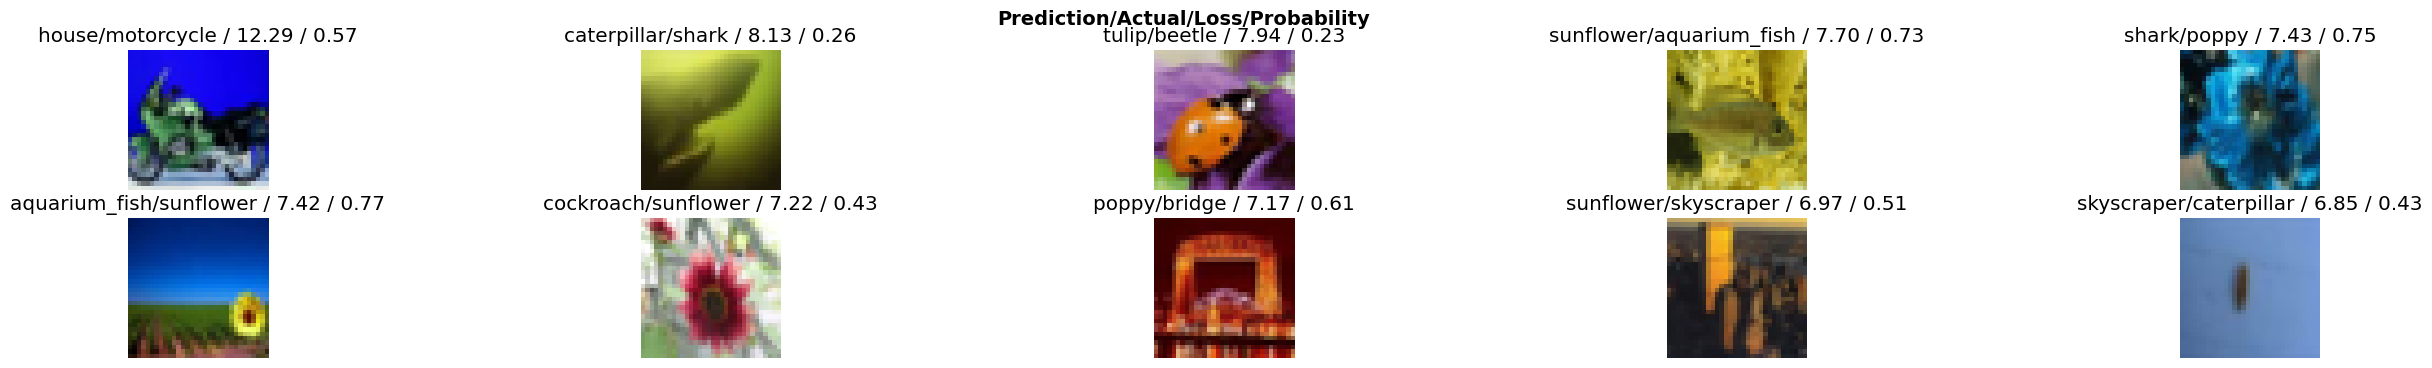

In [ ]:
# we display the n classes with higher confusion level
interp.plot_top_losses(10, nrows=2, figsize=(32,4))

<font color='blue'>What is the total number of parameters of the created model? Break down the account made to reach that figure.

To calculate the total number of parameters in the created model, we need to count the parameters of each layer and sum them up. The parameters in a layer include weights and biases.

Let's break down the calculation for the BaseNet model provided:

1. Convolutional layer 1:
   - Weights: 3 * 7 * 7* 4= 588 parameters
   - Biases: 4*1 parameters
   - Total parameters: 588 (weights) + 4 (biases) = 592

*  Relu and MaxPooling have 0 parameters

2. Convolutional layer 2:
   - Weights: 4 * 5 * 5 * 10 =  1000  parameters
   - Biases: 10*1 parameters
   - Total parameters: 1000 (weights) + 10 (biases) = 1010

3. Fully connected layer 1:
   - Weights: 810 input features * 50 output features=40500 parameters
   - Biases: 50*1 parameters
   - Total parameters:40500 (weights) + 50 (biases) = 40550

4. Fully connected layer 2:
   - Weights: 50 input features * 25 output features = 1250 parameters
   - Biases: 25*1 parameters
   - Total parameters: 1250 (weights) + 25 (biases) = 1275

Now, summing up all the parameters from each layer:
- Total parameters = 592+1010+40550+1275=43427

So, the total number of parameters in the created BaseNet model is 43427.

<font color='blue'>When fastai is used, and a multiclass classification problem like the one indicated in this exercise is addressed, is it necessary to incorporate a SoftMax function (`nn.Softmax()`) as last layer/element/component of your model? Justify the answer.

In fastai, when using a multi-class classification problem with the cross-entropy loss function, it is not necessary to explicitly incorporate a softmax function (`nn.Softmax()`) as the last layer of the model. This is because the cross-entropy loss function already includes the softmax operation internally.

The cross-entropy loss function combined with softmax activation is commonly used in multi-class classification tasks. It not only computes the softmax probabilities but also applies the logarithm to the predicted probabilities before calculating the loss. This combined operation is more numerically stable and efficient than applying softmax separately.

In fastai, when defining a model for multi-class classification and using the `Learner` class with the appropriate loss function (such as `nn.CrossEntropyLoss`), the library automatically handles the softmax operation internally. Therefore, explicitly adding a softmax layer to the model is redundant and unnecessary.

In summary, when using fastai for multi-class classification tasks and employing the cross-entropy loss function, there is no need to include a softmax function as the last layer of the model, as fastai handles softmax internally during training and inference.

# <font color='blue'> **Exercise 2:** **Improvement of the BaseNet model (3.5 points)**
<font color='blue'>Now the goal is to create, by making judicious architectural and implementation choices, an enhanced deep network based on *BaseNet*. Students should perform a sensible combination of different elements, which may include all or some of the following: Convolutional layers (Conv2D, either normal or atrous), Pooling layers (Local and Global MaxPooling2D and AveragePooling2D), Dense layers (also called fully-connected (FC) layers), Non-linear activations, (e.g. ReLu, leaky ReLu, etc.), Flattening (i.e. convert 2D features to 1D features),  Batch Normalization, and/or Regularization (e.g. Dropout or weight decay).

<font color='blue'>It is necessary to emphasize that **it is essential to justify the decisions made in the best possible way** (either through empirical evidence or through scientific literature). It is also essential to highlight that **the improvements made must be carried out incrementally**, that is, it is not enough to create a single model directly and evaluate it. **It is necessary to justify and describe what steps and results have led us to conclude that this model (specific combination of constituent blocks) is appropriate**. It is absolutely essential to describe each of the improvements incorporated, as well as analyze the results obtained.

<font color='blue'>A good combination of layers can largely improve the performance of our new model on these data. To enhance your network, you may consider adding any combination of the following enhancement options:
1. **Data normalization**. Scale normalization of the input data, in general, makes training easier and more robust. Use the DataBlock class with the correct parameters so that the data is well conditioned (mean=0, stddev=1) to improve training. You must ensure that the test set uses the same normalization parameters as the ones employed in training.
2. **Batch normalization**. Batch-normalization layers in most cases help to reduce overfitting and improve model training. Add normalization layers after convolutional layers and before the ReLU layer, but try including it after ReLU layers as well.
3. **Depth increase**. Experiment adding convolutional layers. Do not always put a maxpool layer after each conv layer, as this leads to excessive loss of information by reducing the number of units. If needed use UpSampling (Transposed Convolution) layers to increase the number of units.
4. **Dropout**. This layer introduces regularization by randomly selecting a percentage of active neurons for each mini-batch. This helps the network to specialize neurons in specific and independent information.
5. **Early Stopping**. After how many epochs we should stop training? Keep in mind that you should never use the test set for anything other than the final evaluation. You should decide for how many epochs you will train your model by looking at the training loss and validation accuracy plots (to do so, evaluate the local minima/maxima of the loss function as well as the classification accuracy). Remember that if you choose too many epochs it would quite likely lead to overfitting, while if you select too few your model quite likely won't  learn enough. In your report, you must include a table similar to the one shown in Exercise 1 to illustrate the architecture of your final improved network. In addition, you must explain the steps taken with the partial results obtained that have finally led you to introduce the proposed modifications.
6. **Data augmentation**.  Use the DataBlock class to perform data augmentation, like zoom_range and/or horizontal_flip. Remember that, in general, you should not have any data augmentation in the validation or test sets.

<font color='blue'> Feel free to incorporate modifications not included in the aforementioned list.

In [ ]:
# To be completed by the students



in this part of assignment, I first put the BaseNet that we have it in the previous section and in the rest of code, each time I will change some parameter and see if the test accuracy improve or not, so I keep that or not for the next change.



# Base Net

epoch,train_loss,valid_loss,accuracy,time
0,2.756899,2.703614,0.182667,00:25
1,2.418288,2.450706,0.265333,00:29
2,2.271247,2.295091,0.320000,00:30
3,2.197387,2.190008,0.337333,00:26
4,2.069206,2.154614,0.358667,00:23
5,2.002408,2.076880,0.378000,00:25
6,1.848935,2.034968,0.393333,00:27
7,1.821853,1.971930,0.416667,00:25
8,1.748224,1.956061,0.422667,00:25
9,1.727957,1.952543,0.424667,00:27


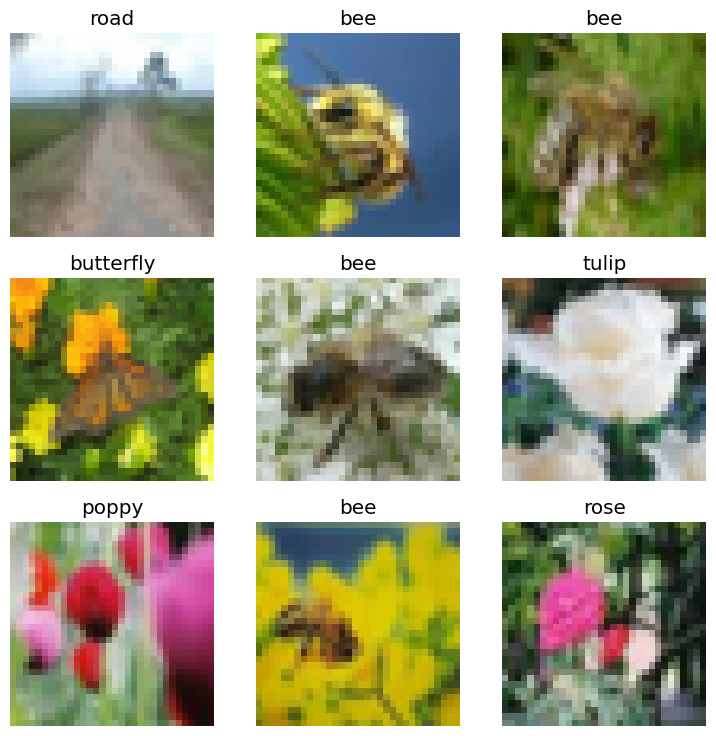

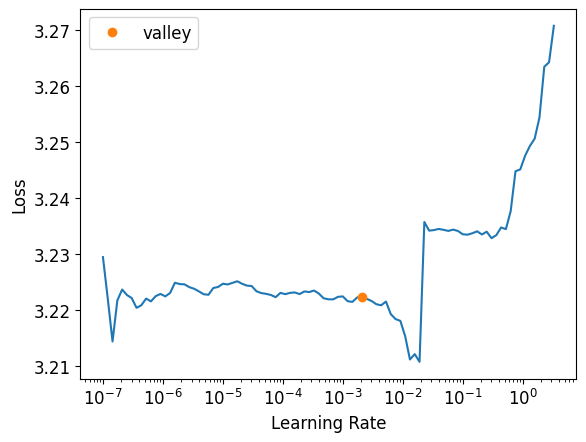

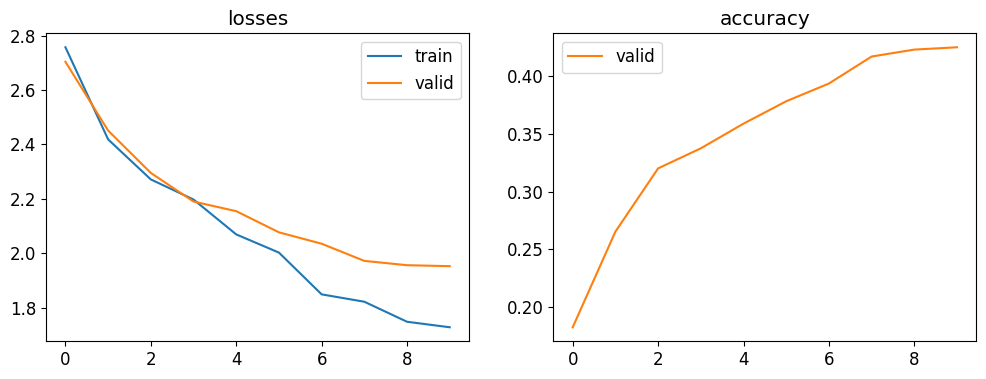

The test accuracy is :  47.2 %


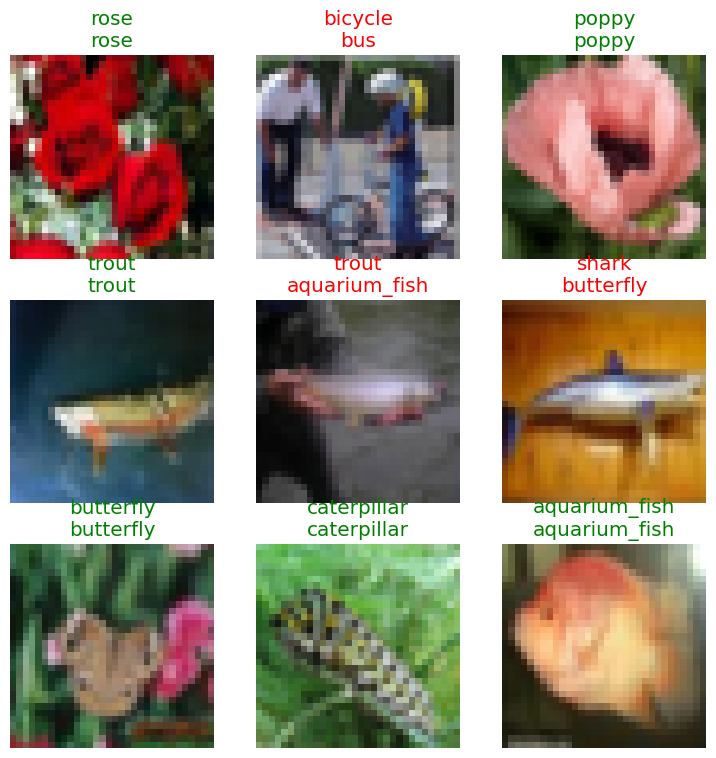

In [ ]:
fix_seed()
# Create DataBlock and DataLoader
datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                      get_items=get_image_files,
                      splitter=RandomSplitter(valid_pct=0.1, seed=42),
                      get_y=parent_label,
                      item_tfms=Resize(32))

dls = datablock.dataloaders(path, bs=32)

#show batch
dls.show_batch()

#import nn
from torch import nn
# BaseNet model definition
base_model = nn.Sequential(
    nn.Conv2d(3, 4, kernel_size=7, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(4, 10, kernel_size=5, padding=0),
    nn.ReLU(),
    Flatten(),
    nn.Linear(810,50),
    nn.ReLU(),
    nn.Linear(50,25)
)

# Create Learner
learn = Learner(dls, base_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.summary()

# Train the model
lr=learn.lr_find()
learn.fit_one_cycle(n_epoch=10,lr_max=lr[0])

#show
learn.recorder.plot_metrics()
learn.show_results()

#test
test_files = get_image_files(path/'test')
# Create a dataloader for the test set with labels
test_dl = learn.dls.test_dl(test_files, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)
print('The test accuracy is : ', round(float(acc)*100, 4), '%')

 the BaseNet test accuracy is 47.2% test, in the rest of this exercise I am going to improve this number in a accumalative way(if the change improve this number I will keep it and if not I will remove it for the next improvement)

# basenet -> 47.2%

I will add data augmentation to the data block by adding `batch_tfms=aug_transforms()`
, it is better to perform data augmentation before normalization in the batch
transformation pipeline. This is because data augmentation involves random transformations applied to the input data,
which can change the statistical properties of the images (such as mean and standard deviation). Performing normalization
after augmentation ensures that the augmented images are properly normalized and consistent for training.



<font color='orange'>I realize that after 8 epochs there is no change in the validation accuracy so I decrese the number of epoches from 10 to 8

epoch,train_loss,valid_loss,accuracy,time
0,3.164823,3.133385,0.070000,00:35
1,2.742793,2.724646,0.171333,00:30
2,2.587953,2.612219,0.204667,00:32
3,2.489432,2.478942,0.270667,00:29
4,2.440835,2.426204,0.284667,00:30
5,2.402038,2.388669,0.291333,00:29
6,2.376082,2.374835,0.305333,00:32
7,2.339360,2.371420,0.301333,00:31


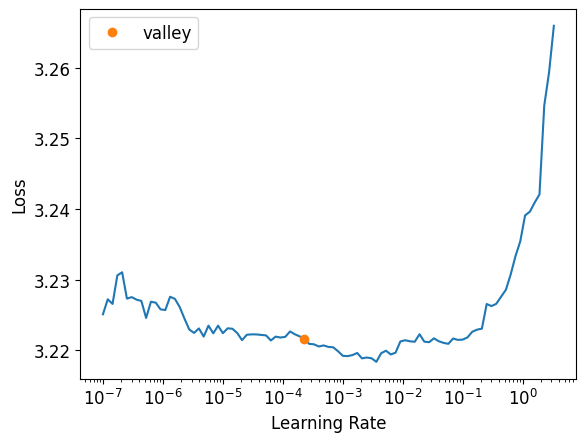

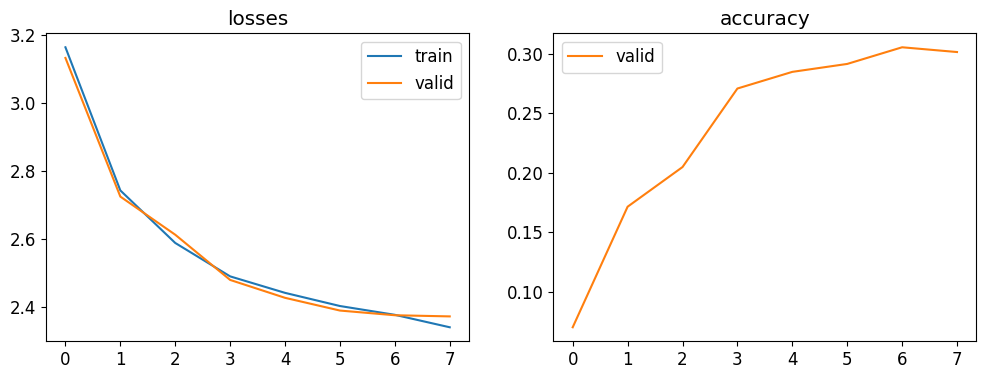

The test accuracy is: 30.84 %


In [ ]:
###ENHANCED1 by adding batch_tfms=aug_transforms()

fix_seed()

from fastai.vision.augment import aug_transforms

# Create DataBlock and DataLoader with data augmentation
datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                      get_items=get_image_files,
                      splitter=RandomSplitter(valid_pct=0.1, seed=42),
                      get_y=parent_label,
                      item_tfms=Resize(32),
                      batch_tfms=aug_transforms(),
                      )

dls = datablock.dataloaders(path, bs=32)

# BaseNet model definition
base_model = nn.Sequential(
    nn.Conv2d(3, 4, kernel_size=7, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(4, 10, kernel_size=5, padding=0),
    nn.ReLU(),
    Flatten(),
    nn.Linear(810,50),
    nn.ReLU(),
    nn.Linear(50,25)
)

# Create Learner
learn = Learner(dls, base_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.summary()

# Train the model
lr = learn.lr_find()
learn.fit_one_cycle(n_epoch=8, lr_max=lr[0])

# Show metrics
learn.recorder.plot_metrics()

# Test
# Create a dataloader for the test set with labels
test_dl = learn.dls.test_dl(test_files, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)
print('The test accuracy is:', round(float(acc) * 100, 4), '%')


actually it is very bad and decrease the test accuracy from 47,2% to 30.84% so I will remove it.

However, I think it is going to be bettre.maybe the reason is the difference in distribution: when you evaluate your model on the test set, you typically want to evaluate its performance on the original, unaltered data, without any augmentations. By using the same augmentations on the test set as on the training set, you are effectively evaluating the model's performance on a different distribution of data than it was trained on.

now I want to add another data augmentation(`item_tfms=[RandomResizedCrop(32, min_scale=0.35),FlipItem(0.5)])` to the data block


epoch,train_loss,valid_loss,accuracy,time
0,2.772980,2.795220,0.155333,00:30
1,2.645010,2.586202,0.237333,00:29
2,2.561085,2.490659,0.251333,00:29
3,2.495479,2.369018,0.281333,00:31
4,2.398355,2.270370,0.319333,00:29
5,2.313760,2.184051,0.334667,00:29
6,2.243496,2.132676,0.350667,00:33
7,2.179784,2.119923,0.346667,00:29


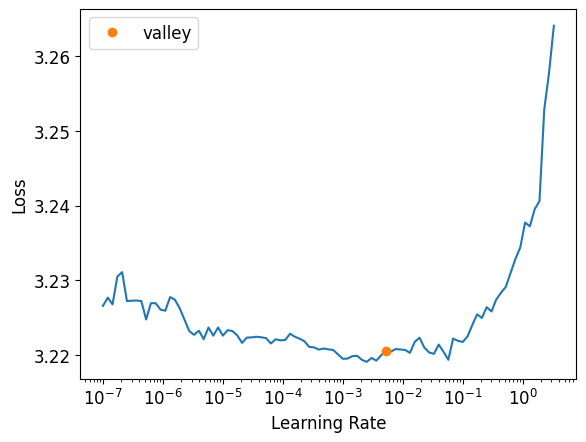

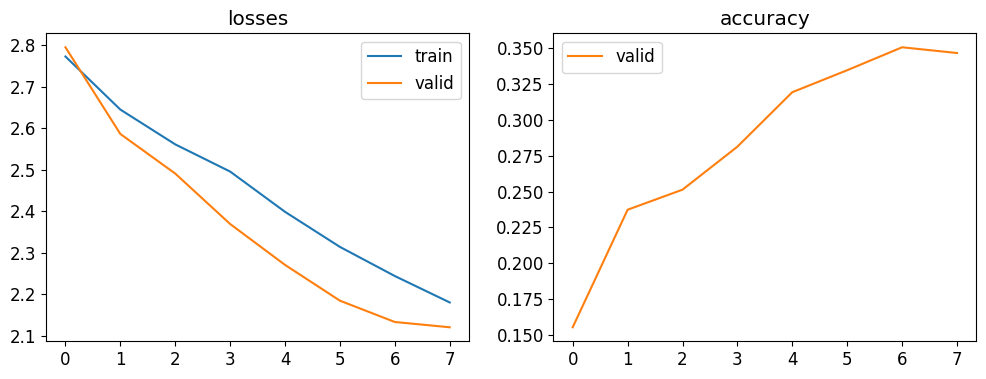

The test accuracy is: 38.16 %


In [ ]:
###ENHANCED2 DATA AUGMENTATION
### by adding item_tfms=[RandomResizedCrop(32, min_scale=0.35),FlipItem(0.5)]

fix_seed()

from fastai.vision.augment import aug_transforms

# Create DataBlock and DataLoader with data augmentation
datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                      get_items=get_image_files,
                      splitter=RandomSplitter(valid_pct=0.1, seed=42),
                      get_y=parent_label,
                      item_tfms=[RandomResizedCrop(32, min_scale=0.35),FlipItem(0.5)]
                      )

dls = datablock.dataloaders(path, bs=32)

# BaseNet model definition
base_model = nn.Sequential(
    nn.Conv2d(3, 4, kernel_size=7, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(4, 10, kernel_size=5, padding=0),
    nn.ReLU(),
    Flatten(),
    nn.Linear(810,50),
    nn.ReLU(),
    nn.Linear(50,25)
)

# Create Learner
learn = Learner(dls, base_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.summary()

# Train the model
lr = learn.lr_find()
learn.fit_one_cycle(n_epoch=8, lr_max=lr[0])

# Show metrics
learn.recorder.plot_metrics()

# Test
test_dl = learn.dls.test_dl(test_files, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)
print('The test accuracy is:', round(float(acc) * 100, 4), '%')


again it is decreasing the 47.2% to 38.16%, so I will remove it

now I add Data normalization with normalized batch tfms

epoch,train_loss,valid_loss,accuracy,time
0,2.694184,2.603235,0.200667,00:31
1,2.352341,2.287135,0.310000,00:34
2,2.211090,2.140188,0.356000,00:29
3,2.095138,2.080879,0.376000,00:29
4,2.054831,1.992833,0.405333,00:30
5,1.962089,1.942076,0.415333,00:29
6,1.933931,1.920429,0.426667,00:30
7,1.895080,1.916497,0.424667,00:32


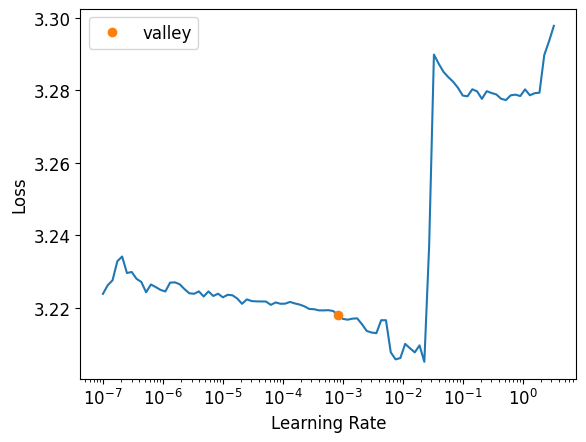

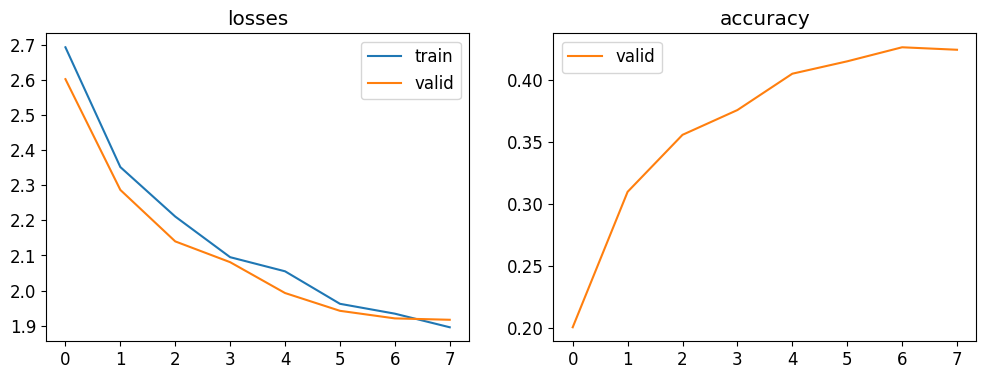

The test accuracy is :  44.8 %


In [ ]:
###ENHANCED3 with Data normalization with normalized batch tfms
fix_seed()
from fastai.vision.augment import aug_transforms

datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                      get_items=get_image_files,
                      splitter=RandomSplitter(valid_pct=0.1, seed=42),
                      get_y=parent_label,
                      item_tfms=Resize(32),
                      batch_tfms=[Normalize.from_stats(*cifar_stats),*aug_transforms()])
# normalize with the cifar values and apply data augmentation. aug_transforms(...) returns a list,
#  so you need to star it if you put it in another list with additional transforms


dls = datablock.dataloaders(path, bs=32)

# Enhanced BaseNet model definition
enhanced_base_model = nn.Sequential(
    nn.Conv2d(3, 4, kernel_size=7, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(4, 10, kernel_size=5, padding=0),
    nn.ReLU(),
    Flatten(),
    nn.Linear(810,50),
    nn.ReLU(),
    nn.Linear(50,25)
)



# Create Learner
learn = Learner(dls, enhanced_base_model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)
learn.summary()

#Train the model
lr=learn.lr_find()
learn.fit_one_cycle(n_epoch=8,lr_max=lr[0])

learn.recorder.plot_metrics()
# Create a dataloader for the test set with labels
test_dl = learn.dls.test_dl(test_files, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)
print('The test accuracy is : ', round(float(acc)*100, 4), '%')

<!-- as we can see it is not working and it is decrease the test accuracy from 34.68% to 32.6% so I will not keep this -->
44.8. still no good

now I will add the BATCH NORMALIZATION LAYER in the network

epoch,train_loss,valid_loss,accuracy,time
0,2.773921,2.687503,0.200000,00:33
1,2.285812,2.470779,0.258667,00:25
2,2.116950,2.141131,0.368000,00:35
3,1.980623,2.104484,0.379333,00:41
4,1.921376,1.998671,0.392667,00:29
5,1.820250,1.981339,0.402000,00:23
6,1.796592,1.978869,0.404667,00:26
7,1.752419,1.981287,0.402667,00:27


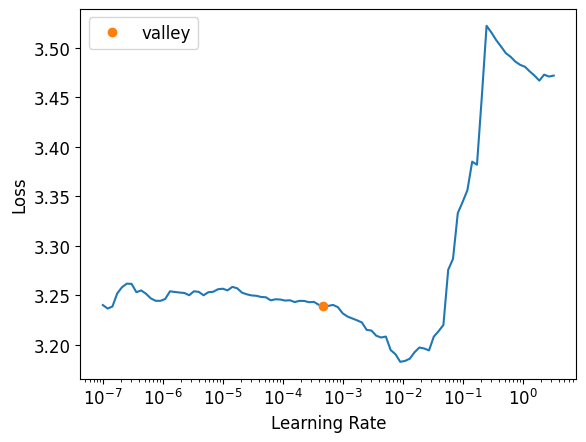

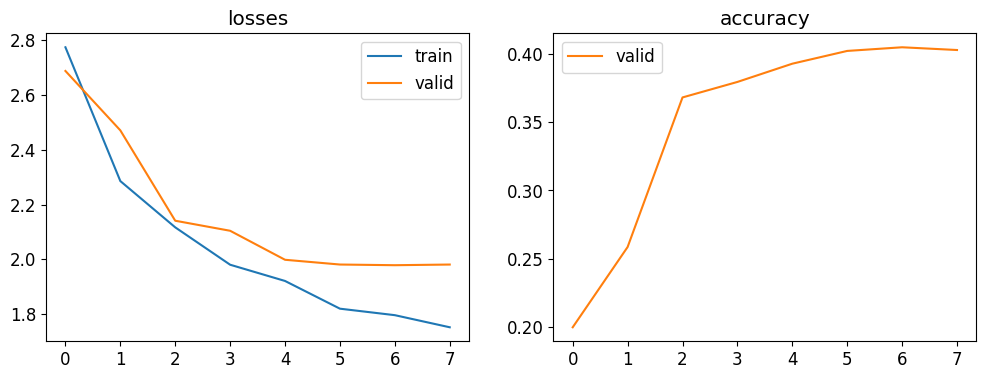

The test accuracy is: 48.4 %


In [ ]:
###ENHANCED4 WITH BATCH NORMALIZATION LAYER
fix_seed()
from fastai.vision.augment import aug_transforms

# Create DataBlock and DataLoader with data augmentation
datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                      get_items=get_image_files,
                      splitter=RandomSplitter(valid_pct=0.1, seed=42),
                      get_y=parent_label,
                      item_tfms=Resize(32)
)

dls = datablock.dataloaders(path, bs=32)

# BaseNet model definition with batch normalization
base_model = nn.Sequential(
    nn.Conv2d(3, 4, kernel_size=7, padding=0),
    nn.ReLU(),
    nn.BatchNorm2d(4),  # BatchNorm2d layer after the first convolution
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(4, 10, kernel_size=5, padding=0),
    nn.ReLU(),
    nn.BatchNorm2d(10),  # BatchNorm2d layer after the second convolution
    Flatten(),
    nn.Linear(810,50),
    nn.ReLU(),
    nn.Linear(50,25)
)

# Create Learner
learn = Learner(dls, base_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.summary()

# Train the model
lr = learn.lr_find()
learn.fit_one_cycle(n_epoch=8, lr_max=lr[0])

# Show metrics
learn.recorder.plot_metrics()

# Test
# Create a dataloader for the test set with labels
test_dl = learn.dls.test_dl(test_files, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)
print('The test accuracy is:', round(float(acc) * 100, 4), '%')


it is perfect inhanced to 48.4%, so I will keep it for the next change.batch normalization layers improve the performance of the model by stabilizing training, reducing internal covariate, providing regularization, and increasing robustness, which leads to better generalization and higher test accuracy.







this time I wnat to use dropout for data augmentation in the new network that we have with the batch normalization layer from the previous change

In [ ]:
###ENHANCED5 BY DROPOUT
fix_seed()
from fastai.vision.augment import aug_transforms

# Create DataBlock and DataLoader with data augmentation and regularization
datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(32),
    batch_tfms=aug_transforms(),
)

dls = datablock.dataloaders(path, bs=32)

# Define a custom CNN model with batch normalization and dropout
base_model = nn.Sequential(
    nn.Conv2d(3, 4, kernel_size=7, padding=0),
    nn.ReLU(),
    nn.BatchNorm2d(4),  # BatchNorm2d layer after the first convolution
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(4, 10, kernel_size=5, padding=0),
    nn.ReLU(),
    nn.BatchNorm2d(10),  # BatchNorm2d layer after the second convolution
    nn.Dropout(0.5),
    Flatten(),
    nn.Linear(810,50),
    nn.ReLU(),
    nn.Linear(50,25)
)

# Create Learner with the custom CNN model
learn = Learner(dls, base_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

# Train the model
learn.fit_one_cycle(n_epoch=8, lr_max=1e-3)

# Evaluate on the test set
test_dl = learn.dls.test_dl(test_files, with_labels=True)
preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)
print(f'Test accuracy: {acc.item() * 100:.2f}%')


epoch,train_loss,valid_loss,accuracy,time
0,2.690737,2.640551,0.205333,00:32
1,2.365165,2.245226,0.322667,00:32
2,2.248050,2.212212,0.324667,00:33
3,2.168031,2.129193,0.354000,00:32
4,2.123899,2.010407,0.382667,00:32
5,2.068443,1.959581,0.394667,00:32
6,2.074647,1.937538,0.400667,00:31
7,2.046166,1.932592,0.403333,00:31


Test accuracy: 44.32%


no! decreasing so, I'll remove it.
actually I didn't expect that, but maybe it is because of interference with Batch Normalization: Dropout layers and batch normalization layers can sometimes have conflicting effects during training. While batch normalization layers stabilize and normalize the activations, dropout layers introduce noise and randomness. If the two regularization techniques are not properly balanced, they can interfere with each other and degrade the model's performance.

ENHANCED BY ADDING MORE FILTERS (8 INSTESD OF 4 AND 16 INSTEAD OF 10 )

epoch,train_loss,valid_loss,accuracy,time
0,2.680429,2.578894,0.250000,00:25
1,2.042730,2.027611,0.392667,00:25
2,1.802277,1.854499,0.442000,00:26
3,1.630429,1.785505,0.454000,00:24
4,1.532967,1.731869,0.470667,00:25
5,1.407889,1.708146,0.482667,00:25
6,1.354378,1.697692,0.482000,00:25
7,1.286956,1.698969,0.480667,00:26


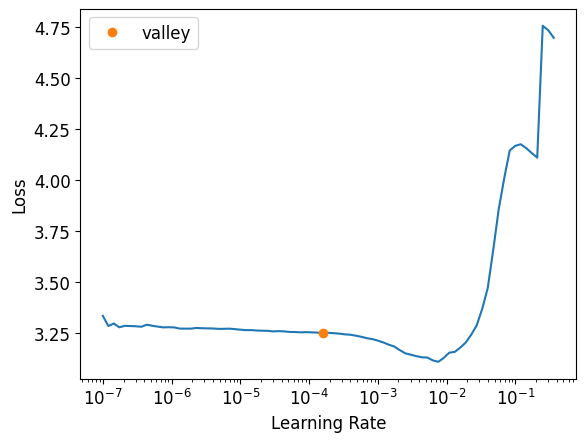

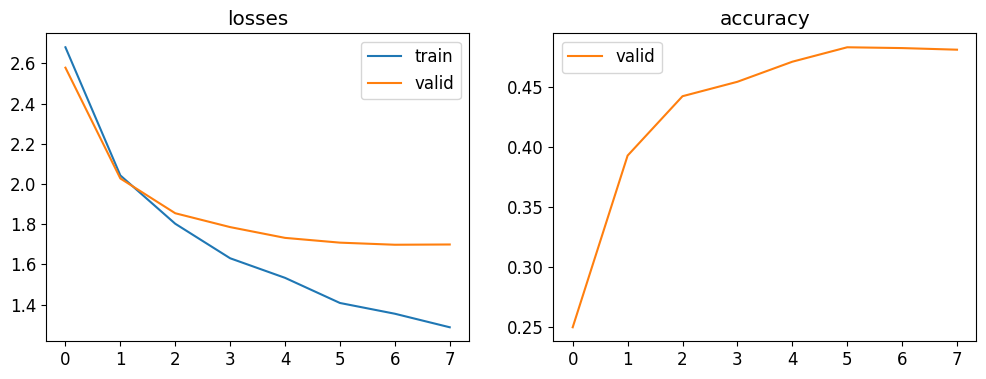

The test accuracy is: 62.24 %


In [ ]:
###ENHANCED6 BY ADDING MORE FILTERS (8 INSTESD OF 4 AND 16 INSTEAD OF 10 )
fix_seed()
from fastai.vision.augment import aug_transforms

# Create DataBlock and DataLoader with data augmentation
datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                      get_items=get_image_files,
                      splitter=RandomSplitter(valid_pct=0.1, seed=42),
                      get_y=parent_label,
                      item_tfms=Resize(32)
                      )

dls = datablock.dataloaders(path, bs=32)

# BaseNet model definition with batch normalization
base_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=7, padding=0),  # Increased number of output channels to 8
    nn.ReLU(),
    nn.BatchNorm2d(8),  # BatchNorm2d layer after the first convolution
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(8, 16, kernel_size=5, padding=0),  # Increased number of output channels to 16
    nn.ReLU(),
    nn.BatchNorm2d(16),  # BatchNorm2d layer after the second convolution
    Flatten(),
    nn.Linear(1296, 256),  # Adjusted input size after flattening layer
    nn.ReLU(),
    nn.Linear(256, 25)  # Adjusted input size after first linear layer
)

# Create Learner
learn = Learner(dls, base_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.summary()

# Train the model
lr = learn.lr_find()
learn.fit_one_cycle(n_epoch=8, lr_max=lr[0])

# Show metrics
learn.recorder.plot_metrics()

# Test
test_dl = learn.dls.test_dl(test_files, with_labels=True)
preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)
print('The test accuracy is:', round(float(acc) * 100, 4), '%')

perfect!!! we reach the test accuracy of 62.24% after six changes. as I thought by increasing the number of filters in the convolutional layers, we are effectively enhancing the model's capacity to learn and represent features from the data, which can lead to improved generalization and higher test accuracy.








this time I will try avg pooling intead of max pooling

epoch,train_loss,valid_loss,accuracy,time
0,2.738937,2.644604,0.232000,00:28
1,2.187702,2.174461,0.338000,00:27
2,1.959580,1.992174,0.396667,00:26
3,1.809955,1.931088,0.425333,00:28
4,1.726006,1.863762,0.437333,00:28
5,1.626444,1.845448,0.446667,00:25
6,1.605758,1.837435,0.453333,00:27
7,1.553553,1.841700,0.447333,00:27


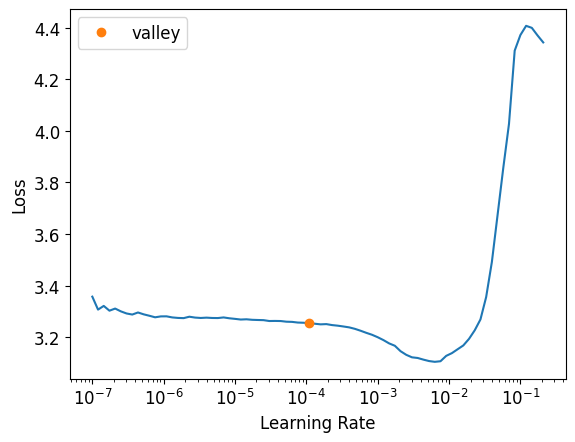

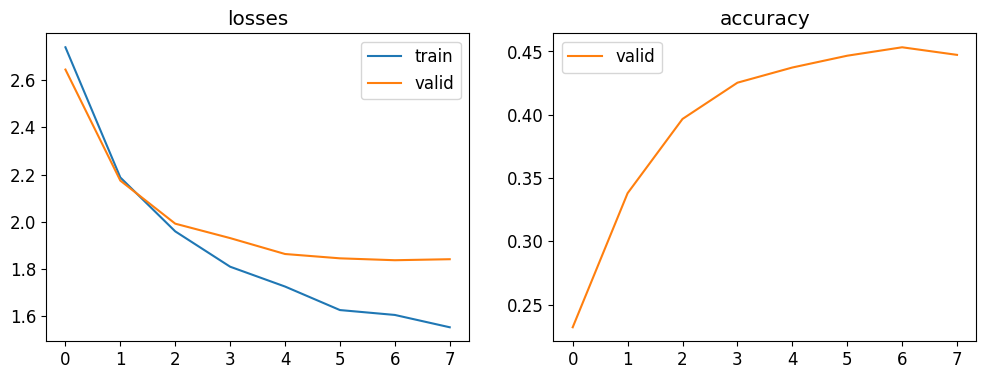

The test accuracy is: 55.08 %


In [ ]:
###ENHANCED7 BY AVG POOLING INSTEAD OF MAX POOLING
fix_seed()
# Create DataBlock and DataLoader with data augmentation
datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                      get_items=get_image_files,
                      splitter=RandomSplitter(valid_pct=0.1, seed=42),
                      get_y=parent_label,
                      item_tfms=Resize(32))

dls = datablock.dataloaders(path, bs=32)

# BaseNet model definition with batch normalization and average pooling
base_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=7, padding=0),  # Increased number of output channels to 8
    nn.ReLU(),
    nn.BatchNorm2d(8),  # BatchNorm2d layer after the first convolution
    nn.AvgPool2d(kernel_size=2),
    nn.Conv2d(8, 16, kernel_size=5, padding=0),  # Increased number of output channels to 16
    nn.ReLU(),
    nn.BatchNorm2d(16),  # BatchNorm2d layer after the second convolution
    Flatten(),
    nn.Linear(1296, 256),  # Adjusted input size after flattening layer
    nn.ReLU(),
    nn.Linear(256, 25)  # Adjusted input size after first linear layer
)

# Create Learner
learn = Learner(dls, base_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.summary()

# Train the model
lr = learn.lr_find()
learn.fit_one_cycle(n_epoch=8, lr_max=lr[0])

# Show metrics
learn.recorder.plot_metrics()

# Test
test_dl = learn.dls.test_dl(test_files, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)
print('The test accuracy is:', round(float(acc) * 100, 4), '%')


but it is not helping

ENHANCED BY ADDING MORE AND MORE FILTERS AND MAXPOOLIG


epoch,train_loss,valid_loss,accuracy,time
0,2.543489,2.429800,0.272000,00:28
1,1.985626,2.120198,0.350667,00:27
2,1.746479,1.820997,0.437333,00:29
3,1.552599,1.813669,0.451333,00:26
4,1.374784,1.749158,0.476000,00:28
5,1.208771,1.708159,0.488000,00:26
6,1.100255,1.673230,0.484000,00:26
7,1.037447,1.677451,0.485333,00:27


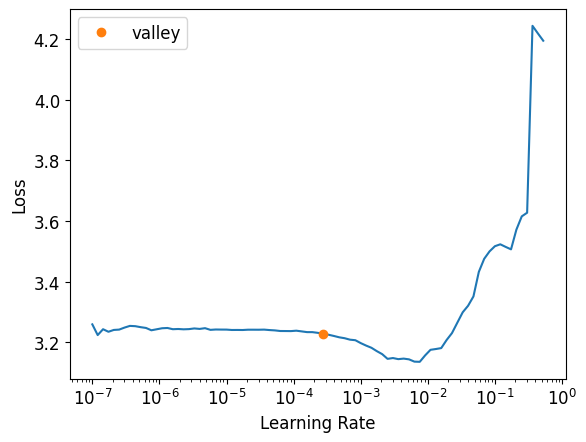

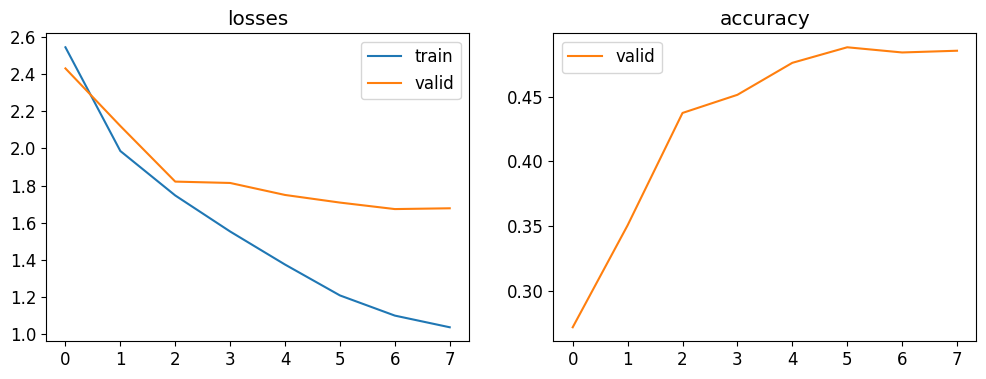

The test accuracy is: 70.0 %


In [ ]:
###ENHANCED8 BY ADDING MORE MORE FILTERS AND MAXPOOLIG
fix_seed()
# Create DataBlock and DataLoader with data augmentation
datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                      get_items=get_image_files,
                      splitter=RandomSplitter(valid_pct=0.1, seed=42),
                      get_y=parent_label,
                      item_tfms=Resize(32))

dls = datablock.dataloaders(path, bs=32)

# BaseNet model definition with batch normalization
base_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=7, padding=0),  # Increased number of output channels to 8
    nn.ReLU(),
    nn.BatchNorm2d(8),  # BatchNorm2d layer after the first convolution
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(8, 16, kernel_size=5, padding=0),  # Increased number of output channels to 16
    nn.ReLU(),
    nn.BatchNorm2d(16),  # BatchNorm2d layer after the second convolution

    nn.Conv2d(16, 32, kernel_size=3, padding=1),  # Increased number of output channels to 32 and added padding
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),  # Adding max pooling
    nn.BatchNorm2d(32),  # BatchNorm2d layer after the third convolution
    nn.Conv2d(32, 64, kernel_size=3, padding=1),  # Increased number of output channels to 32 and added padding
    nn.ReLU(),
    nn.BatchNorm2d(64),  # BatchNorm2d layer after the third convolution

    Flatten(),
    nn.Linear(1024, 256),  # Adjusted input size after flattening layer
    nn.ReLU(),
    nn.Linear(256, 25)  # Adjusted input size after first linear layer
)

# Create Learner
learn = Learner(dls, base_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.summary()

# Train the model
lr = learn.lr_find()
learn.fit_one_cycle(n_epoch=8, lr_max=lr[0])

# Show metrics
learn.recorder.plot_metrics()

# Test
test_dl = learn.dls.test_dl(test_files, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)
print('The test accuracy is:', round(float(acc) * 100, 4), '%')


ok perfect we reach to 70%, so I will keep it

ENHANCED BY ADDING MORE FULLY CONNECTED LAYER


epoch,train_loss,valid_loss,accuracy,time
0,2.562616,2.431663,0.251333,00:26
1,1.998365,2.086677,0.364000,00:26
2,1.788298,1.841687,0.442000,00:26
3,1.560522,1.808251,0.434000,00:26
4,1.356294,1.734313,0.454667,00:28
5,1.177775,1.697818,0.466667,00:26
6,1.020026,1.687906,0.484000,00:28
7,0.935158,1.692803,0.480667,00:26


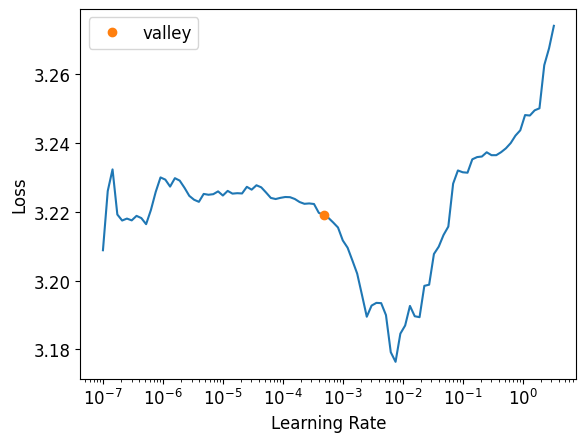

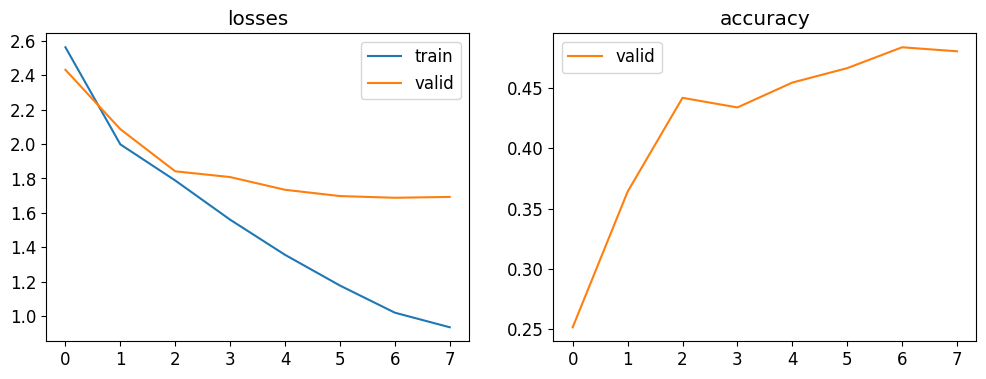

The test accuracy is: 73.12 %


In [ ]:
###ENHANCED9 BY ADDING MORE FULLY CONNECTED LAYER
fix_seed()

# Create DataBlock and DataLoader with data augmentation
datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                      get_items=get_image_files,
                      splitter=RandomSplitter(valid_pct=0.1, seed=42),
                      get_y=parent_label,
                      item_tfms=Resize(32))

dls = datablock.dataloaders(path, bs=32)

# BaseNet model definition with batch normalization
base_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=7, padding=0),  # Increased number of output channels to 8
    nn.ReLU(),
    nn.BatchNorm2d(8),  # BatchNorm2d layer after the first convolution
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(8, 16, kernel_size=5, padding=0),  # Increased number of output channels to 16
    nn.ReLU(),
    nn.BatchNorm2d(16),  # BatchNorm2d layer after the second convolution
    nn.Conv2d(16, 32, kernel_size=3, padding=1),  # Increased number of output channels to 32 and added padding
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),  # Adding max pooling
    nn.BatchNorm2d(32),  # BatchNorm2d layer after the third convolution
    nn.Conv2d(32, 64, kernel_size=3, padding=1),  # Increased number of output channels to 32 and added padding
    nn.ReLU(),
    nn.BatchNorm2d(64),  # BatchNorm2d layer after the third convolution
    Flatten(),

    nn.Linear(1024, 256),  # Adjusted input size after flattening layer
    nn.ReLU(),
    nn.Linear(256, 50),  # Added another fully connected layer with 256 units
    nn.ReLU(),
    nn.Linear(50, 25)  # Adjusted input size after first linear layer
)

# Create Learner
learn = Learner(dls, base_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.summary()

# Train the model
lr = learn.lr_find()
learn.fit_one_cycle(n_epoch=8, lr_max=lr[0])

# Show metrics
learn.recorder.plot_metrics()

# Test
test_dl = learn.dls.test_dl(test_files, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)
print('The test accuracy is:', round(float(acc) * 100, 4), '%')


wow !!! fully connected layers are helpful and we reach 73.12% I think it is because of by incorporating more fully connected layers into the model architecture, we can enhance its capacity to learn and represent complex patterns within the data, that is leads to improve the test performance.







I will add the residual connection and I expect a good improvement

epoch,train_loss,valid_loss,accuracy,time
0,2.524365,2.370011,0.298000,00:27
1,1.867072,2.006118,0.358000,00:29
2,1.608615,1.738119,0.455333,00:27
3,1.420574,1.556389,0.515333,00:27
4,1.200869,1.521380,0.511333,00:29
5,1.037623,1.467768,0.547333,00:27
6,0.915940,1.465115,0.546667,00:27
7,0.814070,1.461800,0.549333,00:29


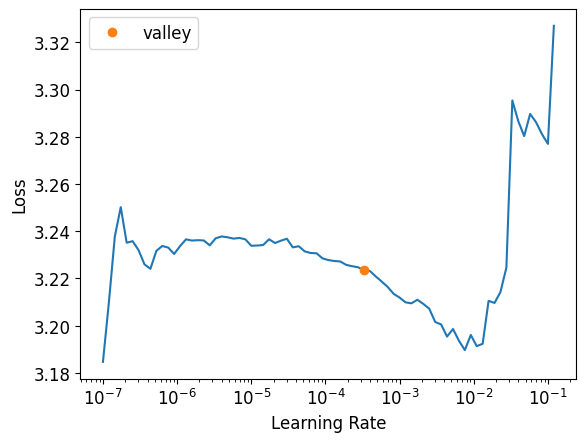

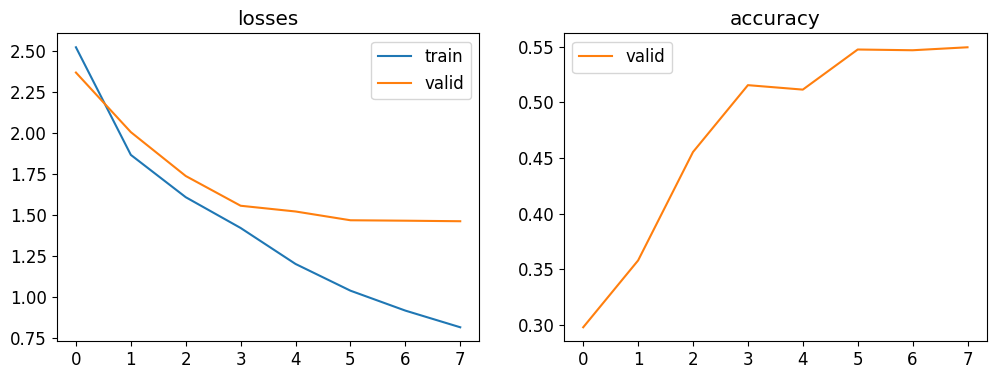

The test accuracy is: 77.0 %


In [ ]:
###ENHANCED10 residual connection

fix_seed()

# Create DataBlock and DataLoader with data augmentation
datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                      get_items=get_image_files,
                      splitter=RandomSplitter(valid_pct=0.1, seed=42),
                      get_y=parent_label,
                      item_tfms=Resize(32))

dls = datablock.dataloaders(path, bs=32)

# BaseNet model definition with batch normalization
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding)
        self.relu = nn.ReLU()
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.downsample = nn.Conv2d(in_channels, out_channels, kernel_size=1, padding=0)

    def forward(self, x):
        residual = x
        x = self.conv1(x)
        x = self.relu(x)
        x = self.batchnorm(x)
        if residual.size() != x.size():
            residual = self.downsample(residual)
        return x + residual  # Residual connection

base_model = nn.Sequential(
    ResidualBlock(3,8, kernel_size=7, padding=3),
    nn.MaxPool2d(kernel_size=2),
    ResidualBlock(8, 16, kernel_size=5, padding=2),
    ResidualBlock(16, 32, kernel_size=3),
    nn.MaxPool2d(kernel_size=2),  # Adding max pooling
    ResidualBlock(32, 64, kernel_size=3),
    nn.MaxPool2d(kernel_size=2),  # Adding max pooling

    Flatten(),
    nn.Linear(1024, 256),  # Adjusted input size after flattening layer
    nn.ReLU(),
    nn.Linear(256, 50),  # Added another fully connected layer with 256 units
    nn.ReLU(),
    nn.Linear(50, 25)  # Adjusted input size after first linear layer
)

# Create Learner
learn = Learner(dls, base_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.summary()

# Train the model
lr = learn.lr_find()
learn.fit_one_cycle(n_epoch=8, lr_max=lr[0])

# Show metrics
learn.recorder.plot_metrics()

# Test
test_dl = learn.dls.test_dl(test_files, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)
print('The test accuracy is:', round(float(acc) * 100, 4), '%')

awesome I thought right and we reach the golden number of 77%
residual connection leading to more effective learning and improved performance on the test set.

now I trying to ENHANCED WITH LEAKYRELU. I think it will be good


epoch,train_loss,valid_loss,accuracy,time
0,2.586109,2.439443,0.292000,00:27
1,1.896010,2.020442,0.353333,00:30
2,1.615546,1.731708,0.458000,00:28
3,1.422026,1.605122,0.497333,00:27
4,1.219126,1.552918,0.510667,00:27
5,1.069974,1.477140,0.542667,00:27
6,0.965400,1.478876,0.532000,00:27
7,0.880639,1.475241,0.533333,00:29


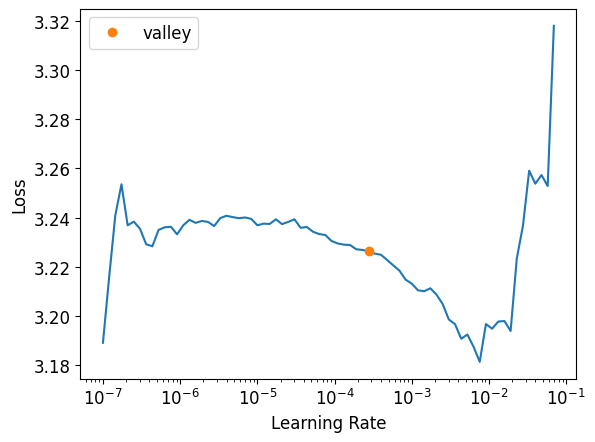

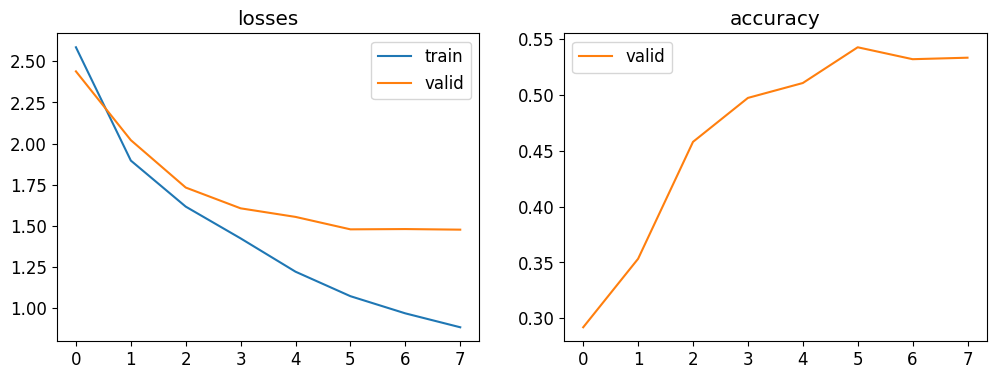

The test accuracy is: 74.72 %


In [ ]:
###ENHANCED11 WITH LEAKYRELU
fix_seed()

# Create DataBlock and DataLoader with data augmentation
datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                      get_items=get_image_files,
                      splitter=RandomSplitter(valid_pct=0.1, seed=42),
                      get_y=parent_label,
                      item_tfms=Resize(32))

dls = datablock.dataloaders(path, bs=32)

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding)
        self.leaky_relu = nn.LeakyReLU()
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.downsample = nn.Conv2d(in_channels, out_channels, kernel_size=1, padding=0)

    def forward(self, x):
        residual = x
        x = self.conv1(x)
        x = self.leaky_relu(x)
        x = self.batchnorm(x)
        if residual.size() != x.size():
            residual = self.downsample(residual)
        return x + residual  # Residual connection

base_model = nn.Sequential(
    ResidualBlock(3,8, kernel_size=7, padding=3),
    nn.MaxPool2d(kernel_size=2),
    ResidualBlock(8, 16, kernel_size=5, padding=2),
    ResidualBlock(16, 32, kernel_size=3),
    nn.MaxPool2d(kernel_size=2),  # Adding max pooling
    ResidualBlock(32, 64, kernel_size=3),
    nn.MaxPool2d(kernel_size=2),  # Adding max pooling
    Flatten(),
    nn.Linear(1024, 256),  # Adjusted input size after flattening layer
    nn.LeakyReLU(),
    nn.Linear(256, 50),  # Added another fully connected layer with 256 units
    nn.LeakyReLU(),
    nn.Linear(50, 25)  # Adjusted input size after first linear layer
)

# Create Learner
learn = Learner(dls, base_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.summary()

# Train the model
lr = learn.lr_find()
learn.fit_one_cycle(n_epoch=8, lr_max=lr[0])

# Show metrics
learn.recorder.plot_metrics()

# Test
test_dl = learn.dls.test_dl(test_files, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)
acc = accuracy(preds, targs)
print('The test accuracy is:', round(float(acc) * 100, 4), '%')


nope! it is decrease a little bit, I think it is because of the saturation

in the summary of exercise 2 of this assignment, I should say that the final test accuracy of my code is 77.0% that I reach to this number after 11 changes both in the dataloader and the network.